# Principal Component Analysis with Cancer Data

In [80]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [82]:
cancer_df = pd.read_csv('breast-cancer-wisconsin-data.csv')

In [83]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [84]:
cancer_df.shape

(699, 11)

In [85]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [86]:
cancer_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Observing 'Bare Nuclei' as numeric column. However showing as object. Will convert it to int

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [87]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [88]:
cancer_df['Bare Nuclei']=cancer_df['Bare Nuclei'].replace({'?':None})
cancer_df[cancer_df.isnull().any(axis=1)]


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,None,7,3,1,4
40,1096800,6,6,6,9,6,None,7,8,1,2
139,1183246,1,1,1,1,1,None,2,1,1,2
145,1184840,1,1,3,1,2,None,2,1,1,2
158,1193683,1,1,2,1,3,None,1,1,1,2
164,1197510,5,1,1,1,2,None,3,1,1,2
235,1241232,3,1,4,1,2,None,3,1,1,2
249,169356,3,1,1,1,2,None,3,1,1,2
275,432809,3,1,3,1,2,None,2,1,1,2
292,563649,8,8,8,1,2,None,6,10,1,4


In [89]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [90]:
cancer_df.dropna(inplace=True)
cancer_df.shape

(683, 11)

In [92]:
cancer_df.drop_duplicates(subset='ID', keep='first', inplace=True)
cancer_df.shape

(630, 11)

In [35]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [93]:
cancer_df['Bare Nuclei']=cancer_df['Bare Nuclei'].astype('int')

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variable

In [94]:
cancer_df.drop('ID',inplace=True,axis=1)

In [95]:
cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,630.0,4.496825,2.862369,1.0,2.0,4.0,6.0,10.0
Cell Size,630.0,3.198413,3.072572,1.0,1.0,1.0,5.0,10.0
Cell Shape,630.0,3.276190,3.002898,1.0,1.0,2.0,5.0,10.0
Marginal Adhesion,630.0,2.917460,2.927233,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,630.0,3.295238,2.255918,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,630.0,3.620635,3.669219,1.0,1.0,1.0,7.0,10.0
Normal Nucleoli,630.0,3.506349,2.470003,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,630.0,2.957143,3.119721,1.0,1.0,1.0,4.0,10.0
Mitoses,630.0,1.628571,1.762119,1.0,1.0,1.0,1.0,10.0
Class,630.0,2.730159,0.963670,2.0,2.0,2.0,4.0,4.0


In [96]:
cancer_df.groupby('Class').count()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,,,,,,,,,
2,400,400,400,400,400,400,400,400,400
4,230,230,230,230,230,230,230,230,230


Observing class imbalance. 2 - Benign has more data than 4- malignant

In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

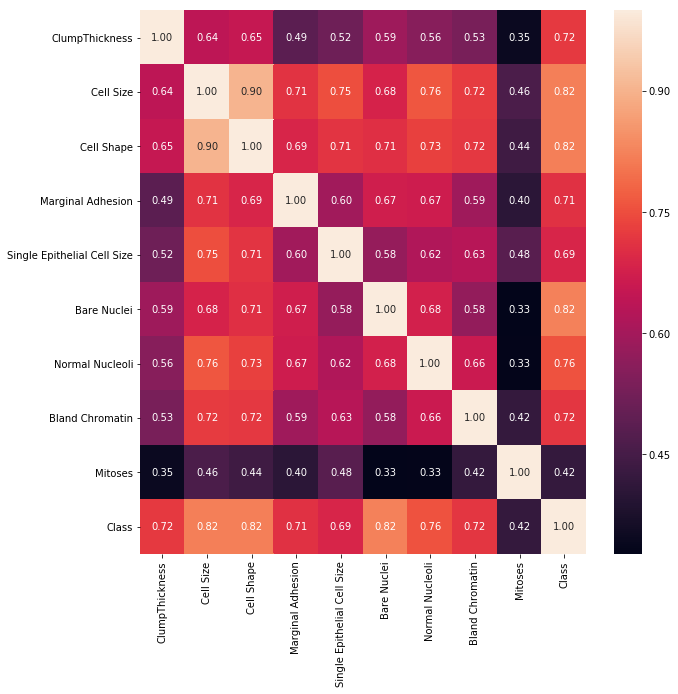

In [97]:
corr=cancer_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,annot=True,fmt='0.2f')

Observing high correlation between the below features :

cell size and cell shape have high correlation with most other features , except mitoses

class and Bare Nuclei

cell size and cell shape

In [1]:
#Let us check for pair plots

C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


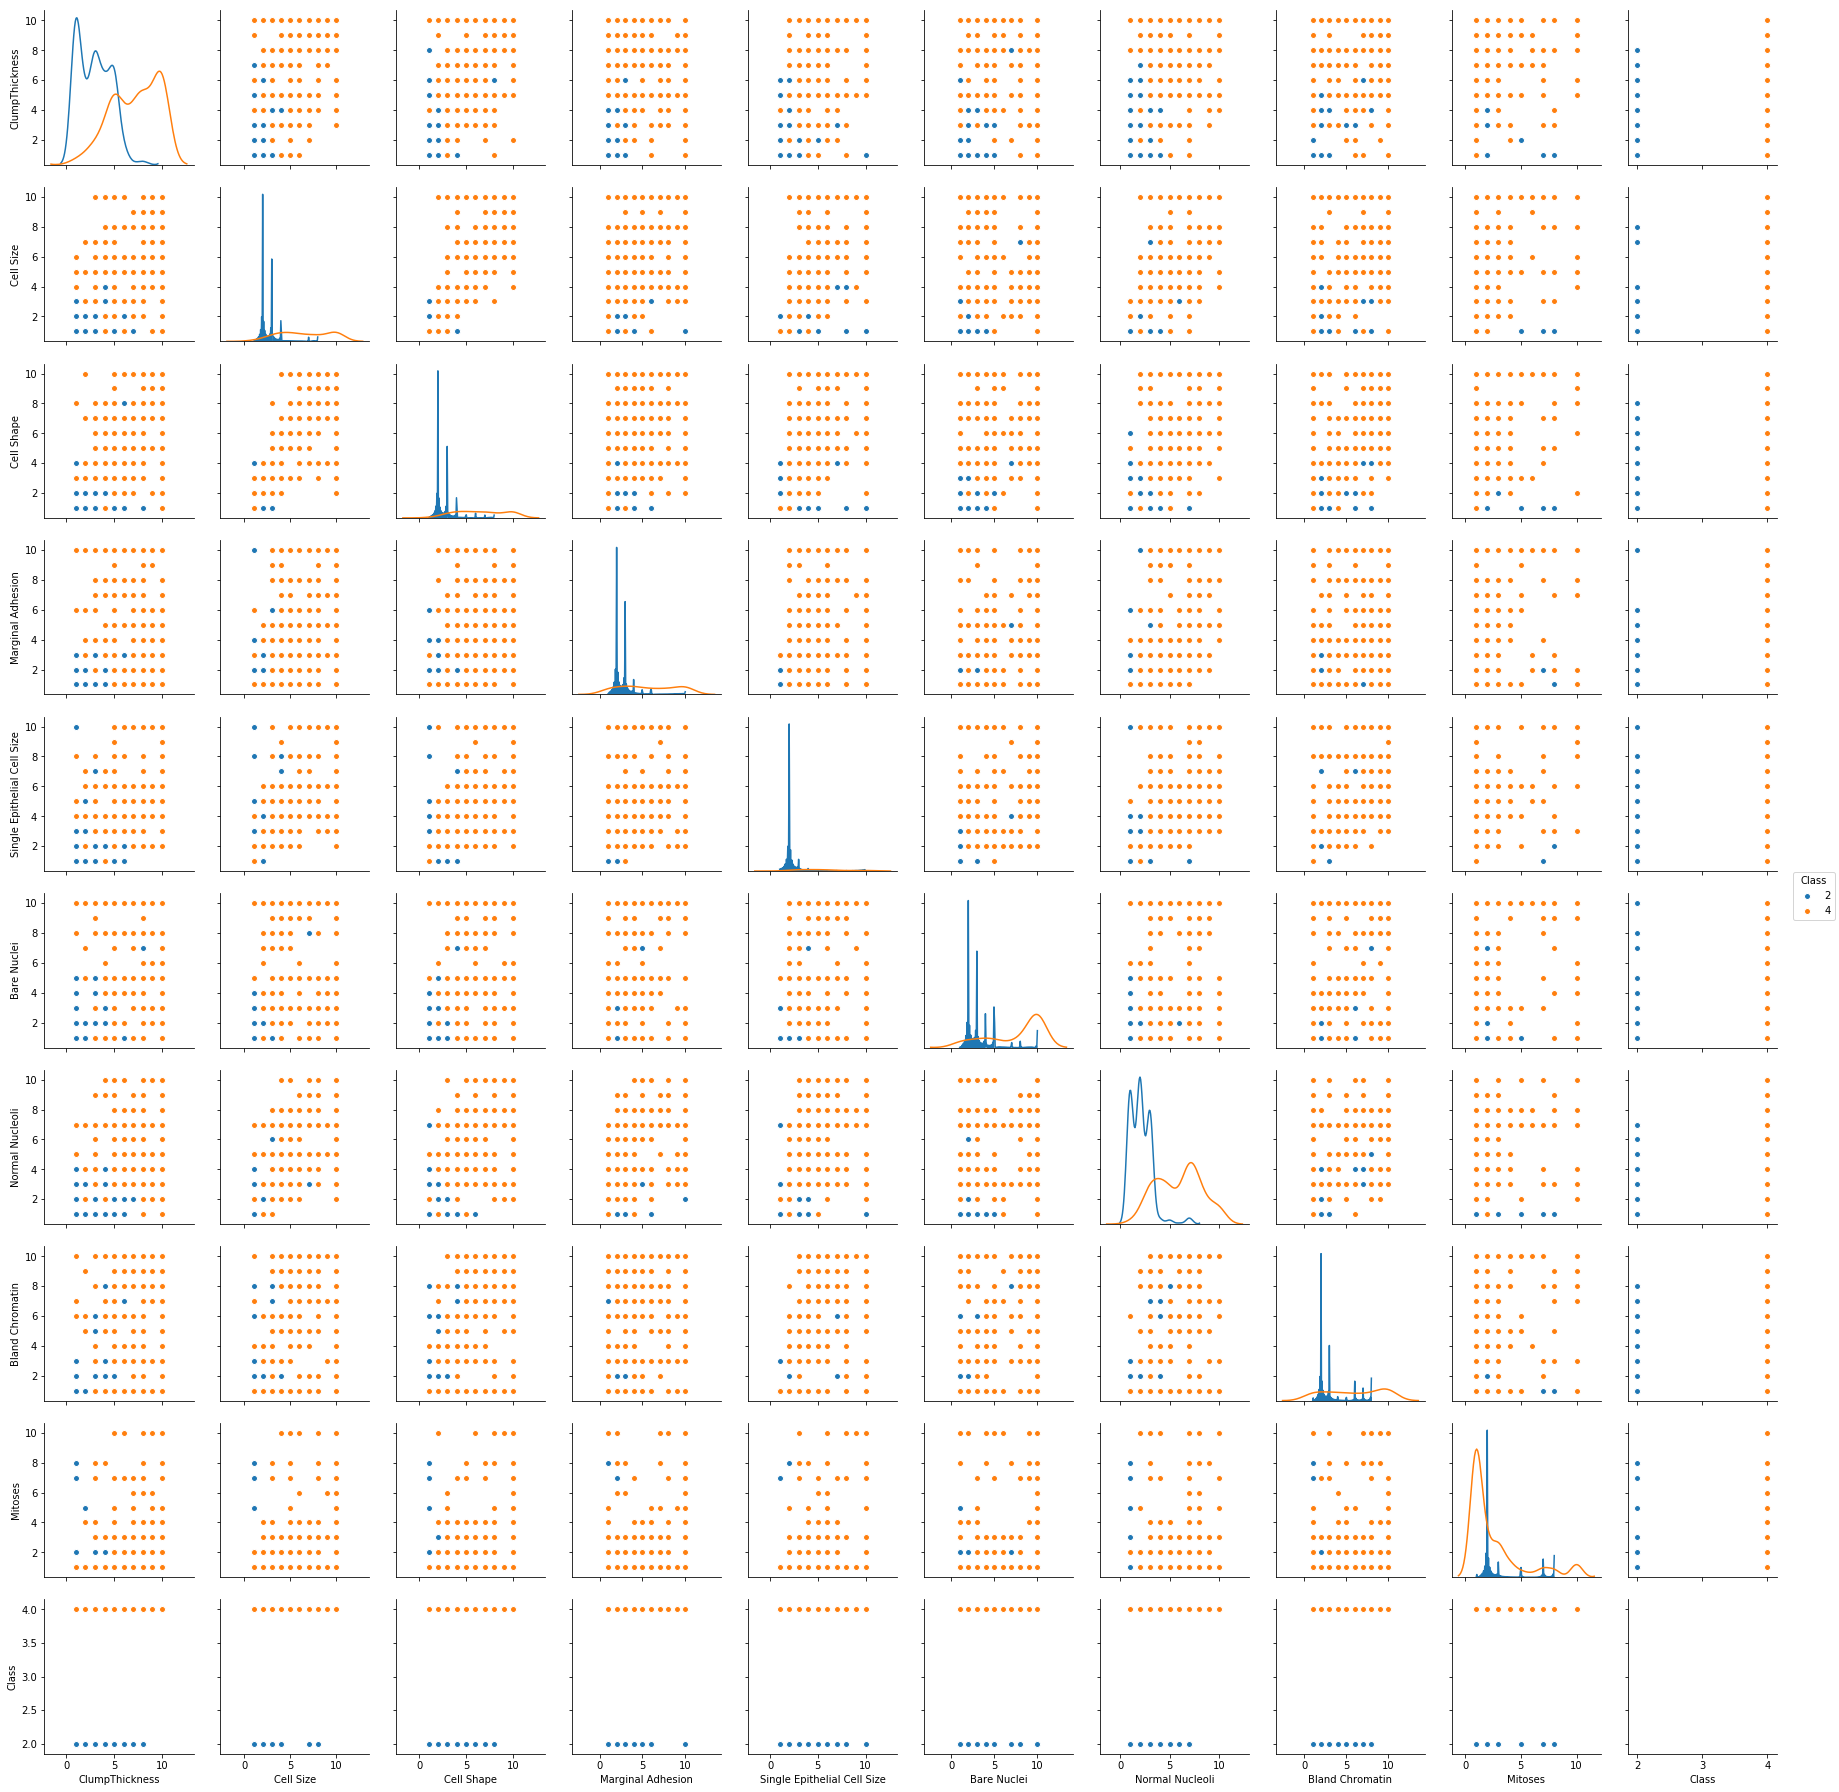

In [98]:
sns.pairplot(cancer_df,diag_kind='kde',hue='Class')

Looking at the pairplot, I observe that cell size, cell shape, marginal adhesion, bland chromatin have very similar kinds of graph. They may be highly correlated to each other

Will be dropping cell shape intuitively

In [99]:
cancer_df.drop('Cell Shape',inplace=True,axis=1)

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
# We could see most of the outliers are now removed.

In [110]:
from scipy.stats import zscore
X=cancer_df.drop('Class',axis=1)
cancer_df_z = X.apply(zscore)

In [111]:
#Removing outliers based on 2.5 z-score
#cancer_df_z=cancer_df_z[(np.abs(cancer_df_z) < 2.5).all(axis=1)]
cancer_df_z.shape

(630, 8)

In [112]:
cancer_df_z['Class']=cancer_df['Class']
cancer_df_z.shape

(630, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019AA09B0>,
      dtype=object)

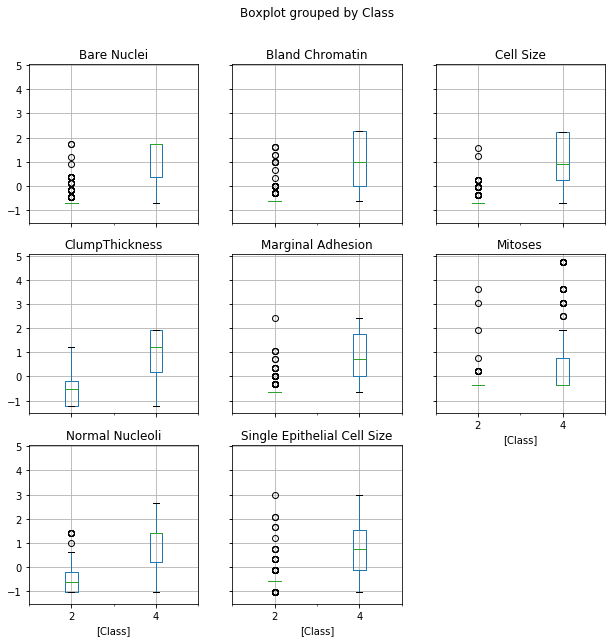

In [113]:
cancer_df_z.boxplot(by='Class', layout=(3,3), figsize=(10, 10))

Since most of the benign cancer cells show up as outliers, I have avoided outliers removal

# Q6 Create a covariance matrix for identifying Principal components

In [2]:
# PCA
# Step 1 - Create covariance matrix


In [114]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [115]:
X=cancer_df_z.drop('Class',axis=1)
y=cancer_df_z.pop('Class')

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

In [117]:
#X_centered = X - X.mean(axis=0)

In [215]:
pca = PCA(n_components=5)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [230]:
cov = np.cov(X_centered.T)

In [231]:
cov

array([[1.00158983, 0.64327145, 0.48724397, 0.5177558 , 0.5927726 ,
        0.55709649, 0.53396136, 0.34766992],
       [0.64327145, 1.00158983, 0.7142496 , 0.7521513 , 0.68296411,
        0.76199219, 0.72583684, 0.46010573],
       [0.48724397, 0.7142496 , 1.00158983, 0.59665074, 0.6735614 ,
        0.66826292, 0.59455422, 0.40554412],
       [0.5177558 , 0.7521513 , 0.59665074, 1.00158983, 0.57837894,
        0.62035762, 0.63034284, 0.48272361],
       [0.5927726 , 0.68296411, 0.6735614 , 0.57837894, 1.00158983,
        0.67960512, 0.57740057, 0.3273633 ],
       [0.55709649, 0.76199219, 0.66826292, 0.62035762, 0.67960512,
        1.00158983, 0.6640909 , 0.33090872],
       [0.53396136, 0.72583684, 0.59455422, 0.63034284, 0.57740057,
        0.6640909 , 1.00158983, 0.42028803],
       [0.34766992, 0.46010573, 0.40554412, 0.48272361, 0.3273633 ,
        0.33090872, 0.42028803, 1.00158983]])

# Q7 Identify eigen values and eigen vector

In [131]:
# Step 2- Get eigen values and eigen vector

In [232]:
eigvals, eigvecs = np.linalg.eig(cov)

In [233]:
eigvals

array([5.07462438, 0.78988567, 0.54169707, 0.17759878, 0.46220424,
       0.30148464, 0.2940407 , 0.37118312])

In [234]:
eigvecs

array([[-3.26426168e-01, -1.37416469e-01, -8.79288531e-01,
         1.66488052e-01,  2.95962397e-04, -2.71287230e-01,
         9.94883399e-03,  5.01795590e-04],
       [-4.05859450e-01, -3.37194350e-02,  4.34861993e-02,
        -8.63556941e-01,  1.65622764e-01, -1.69799294e-01,
        -1.28664194e-01,  1.17056787e-01],
       [-3.62565648e-01, -9.27083848e-02,  3.79108227e-01,
         1.82700075e-01, -4.88176605e-01, -6.25764577e-01,
         2.25471317e-01, -4.59774051e-02],
       [-3.63688739e-01,  1.75515332e-01,  1.45727614e-01,
         3.09020889e-01,  3.62447686e-01,  7.26374793e-02,
         1.31701390e-01,  7.52465706e-01],
       [-3.61219385e-01, -2.86313122e-01, -4.30371680e-02,
        -8.24670902e-02, -4.86586444e-01,  6.78418942e-01,
         2.80973050e-01,  5.41096088e-02],
       [-3.75124047e-01, -2.55402398e-01,  1.83915693e-01,
         2.77662885e-01,  6.16784397e-02,  1.25597805e-01,
        -7.95800861e-01, -1.73930608e-01],
       [-3.62477645e-01,  1.394353

# Q8 Find variance and cumulative variance by each eigen vector

In [235]:
pca.components_

array([[ 3.26426168e-01,  4.05859450e-01,  3.62565648e-01,
         3.63688739e-01,  3.61219385e-01,  3.75124047e-01,
         3.62477645e-01,  2.49826294e-01],
       [-1.37416469e-01, -3.37194350e-02, -9.27083848e-02,
         1.75515332e-01, -2.86313122e-01, -2.55402398e-01,
         1.39435300e-02,  8.90606101e-01],
       [-8.79288531e-01,  4.34861993e-02,  3.79108227e-01,
         1.45727614e-01, -4.30371680e-02,  1.83915693e-01,
         1.29838153e-01, -8.64055534e-02],
       [ 2.95962397e-04,  1.65622764e-01, -4.88176605e-01,
         3.62447686e-01, -4.86586444e-01,  6.16784397e-02,
         5.41357395e-01, -2.63146086e-01],
       [ 5.01795590e-04,  1.17056787e-01, -4.59774051e-02,
         7.52465706e-01,  5.41096088e-02, -1.73930608e-01,
        -5.96080257e-01, -1.71719299e-01]])

In [236]:
pca.explained_variance_

array([5.07462438, 0.78988567, 0.54169707, 0.46220424, 0.37118312])

In [237]:
pca.explained_variance_ratio_

array([0.63332118, 0.09857899, 0.06760465, 0.05768382, 0.04632424])

<Figure size 720x504 with 0 Axes>

Text(0.5,0,'Number of components')

Text(0,0.5,'Total explained variance')

(0, 3)

([<matplotlib.axis.YTick at 0x1f3aee80>,
 <a list of 12 Text yticklabel objects>)

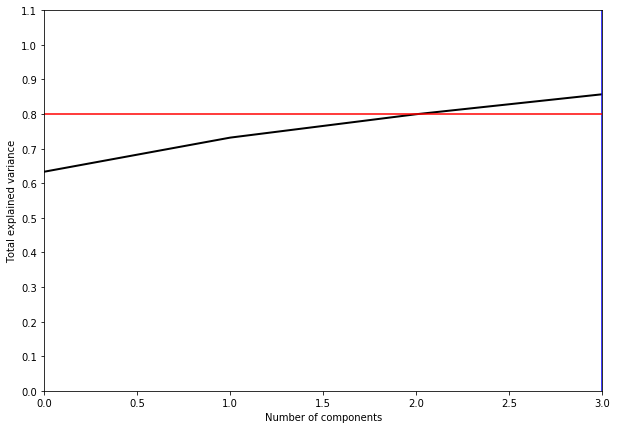

In [238]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 3)
plt.yticks(np.arange(0, 1.2, 0.1))

plt.axvline(3, c='b')
plt.axhline(0.8, c='r')

plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [239]:
X_pca = pca.transform(X_centered)

In [240]:
X_pca.shape

(630, 5)

# Q10 Find correlation between components and features

In [241]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(pca.transform(X_train), y_train)
model.score(pca.transform(X_test), y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

0.9682539682539683

In [242]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=7,n_estimators=10,criterion='entropy')
model.fit(pca.transform(X_train), y_train)
model.score(pca.transform(X_test), y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

0.9576719576719577

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [243]:
movies_df=pd.read_csv('movies_metadata.csv')

C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [245]:
movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [195]:
movies_df.shape

(45466, 24)

In [260]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [263]:
movies_df[movies_df.isnull().any(axis=1)]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
10,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",...,1995-11-17,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0


In [266]:
movies_df_1=movies_df.dropna()
movies_df_1.shape
movies_df.shape

(693, 24)

(45466, 24)

On observing the data, I found that there are some faulty values in adult column. Retaining only TRUE nd FALSE values. Dropping other 3 rows 

In [259]:
movies_df=movies_df[((movies_df['adult']!="TRUE").any() or (movies_df['adult']!="FALSE").any())]

KeyError: True

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

# Q22 Change the column indices from 0 to 99

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.